In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
filepath = '~/Desktop/UCI HAR Dataset/train/Inertial Signals/total_acc_y_train.txt'
df = pd.read_csv(filepath, header=None, delim_whitespace=True)
df.values.shape

(7352, 128)

In [17]:
# load a single txt file as a numpy array
def load_file(filepath):
    df = pd.read_csv(filepath, header=None, delim_whitespace=True)
    return df.values

In [19]:
load_file(filepath).shape

(7352, 128)

In [28]:
# load a group of files, such as x y and z data for a given variable
def load_group(filenames, directory=''):
    loaded = []
    for name in filenames:
        data = load_file(directory + name)
        loaded.append(data)
    # stack group so that features are in the 3rd dimension
    loaded = np.dstack(loaded)
    return loaded

In [29]:
train_dir = '~/Desktop/UCI HAR Dataset/train/Inertial Signals/'
filenames = ['total_acc_x_train.txt', 'total_acc_y_train.txt', 'total_acc_z_train.txt']
total_acc = load_group(filenames, directory=train_dir)
total_acc.shape

(7352, 128, 3)

In [35]:
# load a dataset group, such as train or test
def load_dataset(group, main_data_dir=''):
    filepath = main_data_dir + group + '/Inertial Signals/'
    # get all 9 files in Inertial Signals into a single filename list
    filenames = []
    # total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    # body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    # body gyroscope
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    # load input data
    X = load_group(filenames, filepath)
    # load class output 
    y = load_file(main_data_dir + group + '/y_'+group+'.txt')
    return X, y

In [36]:
# load train data
trainX, trainy = load_dataset('train', '~/Desktop/UCI HAR Dataset/')
print(trainX.shape, trainy.shape)

(7352, 128, 9) (7352, 1)


In [37]:
# load test data
testX, testy = load_dataset('test', '~/Desktop/UCI HAR Dataset/')
print(testX.shape, testy.shape)

(2947, 128, 9) (2947, 1)


In [64]:
# summarize the balance of class in an output variable column
def class_breakdown(data):
    # convert numpy array to dataframe
    df = pd.DataFrame(data)
    # get value_counts number
    counts = df[0].value_counts()
    # get value_counts percentage
    percent = df[0].value_counts(normalize=True)*100
    # summarize
    for i in np.sort(df[0].unique()):
        print('Class=%d, total=%d, percentage=%.3f' % (i, counts[i], percent[i]))    

In [66]:
# train file class breakdown
print('Train Dataset')
class_breakdown(trainy)

#test file class breakdown
print('Test Dataset')
class_breakdown(testy)

# summarize combined class breakdown
print('Both')
combined = np.vstack((trainy, testy))
class_breakdown(combined)

Train Dataset
Class=1, total=1226, percentage=16.676
Class=2, total=1073, percentage=14.595
Class=3, total=986, percentage=13.411
Class=4, total=1286, percentage=17.492
Class=5, total=1374, percentage=18.689
Class=6, total=1407, percentage=19.138
Test Dataset
Class=1, total=496, percentage=16.831
Class=2, total=471, percentage=15.982
Class=3, total=420, percentage=14.252
Class=4, total=491, percentage=16.661
Class=5, total=532, percentage=18.052
Class=6, total=537, percentage=18.222
Both
Class=1, total=1722, percentage=16.720
Class=2, total=1544, percentage=14.992
Class=3, total=1406, percentage=13.652
Class=4, total=1777, percentage=17.254
Class=5, total=1906, percentage=18.507
Class=6, total=1944, percentage=18.876


In [102]:
sub_map = load_file('~/Desktop/UCI HAR Dataset/train/subject_train.txt')
train_subjects = np.unique(sub_map)
print(train_subjects)
print(sub_map.shape)

[ 1  3  5  6  7  8 11 14 15 16 17 19 21 22 23 25 26 27 28 29 30]
(7352, 1)


In [84]:
sub_id = train_subjects[0]
ix = [i for i in range(len(sub_map)) if sub_map[i]==sub_id]

In [104]:
print(train_subjects[0])
print(train_subjects[1])

1
3


In [106]:
len(sub_map)

7352

In [109]:
sub_map[400]

array([3])

In [88]:
len(ix)

341

In [110]:
# get all data for one subject
def data_for_subject(X, y, sub_map, sub_id):
    # get row indexes for the subject id
    ix = [i for i in range(len(sub_map)) if sub_map[i]==sub_id]
    # return the selected samples
    return X[ix, :, :], y[ix]

In [111]:
# convert a series of windows to a 1D list
def to_series(windows):
    series = []
    for window in windows:
        # remove the overlap from the window
        half = int(len(window) / 2) - 1
        for value in window[-half:]:
            series.append(value)
    return series

In [112]:
# plot the data for one subject
def plot_subject(X, y):
    plt.figure()
    # determine the total number of plots
    n, off = X.shape[2] + 1, 0
    # plot total acc
    for i in range(3):
        plt.subplot(n, 1, off+1)
        plt.plot(to_series(X[:, :, off]))
        plt.title('total acc '+str(i), y=0, loc='left')
        off += 1
    # plot body acc
    for i in range(3):
        plt.subplot(n, 1, off+1)
        plt.plot(to_series(X[:, :, off]))
        plt.title('body acc '+str(i), y=0, loc='left')
        off += 1
    # plot body gyro
    for i in range(3):
        plt.subplot(n, 1, off+1)
        plt.plot(to_series(X[:, :, off]))
        plt.title('body gyro '+str(i), y=0, loc='left')
        off += 1
    # plot activities
    plt.subplot(n, 1, n)
    plt.plot(y)
    plt.title('activity', y=0, loc='left')
    plt.show()

[ 1  3  5  6  7  8 11 14 15 16 17 19 21 22 23 25 26 27 28 29 30]
(347, 128, 9) (347, 1)


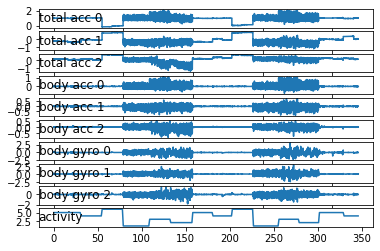

In [113]:
# load data
trainX, trainy = load_dataset('test', '~/Desktop/UCI HAR Dataset/')
# load mapping of rows to subjects
sub_map = load_file('~/Desktop/UCI HAR Dataset/train/subject_train.txt')
train_subjects = np.unique(sub_map)
print(train_subjects)
# get the data for one subject
sub_id = train_subjects[0]
subX, suby = data_for_subject(trainX, trainy, sub_map, sub_id)
print(subX.shape, suby.shape)
# plot data for subject
plot_subject(subX, suby)